In [177]:
import pandas as pd
import numpy as np
from fbprophet import Prophet
import matplotlib.pyplot as plt
 
%matplotlib inline
 
plt.rcParams['figure.figsize']=(20,10)
plt.style.use('ggplot')

In [178]:
data = pd.read_csv("../Resources/lithium_carbonate_price.csv", index_col='Year', parse_dates=True)
data

,Average price of lithium carbonate
Year,
2010-01-01,5180
2011-01-01,5180
2012-01-01,6060
2013-01-01,6800
2014-01-01,6690
2015-01-01,6500
2016-01-01,8650
2017-01-01,15000
2018-01-01,17000


In [179]:
data = data.rename(columns={'Average price of lithium carbonate':'Lithium_price'})
data

,Lithium_price
Year,
2010-01-01,5180
2011-01-01,5180
2012-01-01,6060
2013-01-01,6800
2014-01-01,6690
2015-01-01,6500
2016-01-01,8650
2017-01-01,15000
2018-01-01,17000


In [180]:
df = data.reset_index().rename(columns={'Year':'ds', 'Lithium_price':'y'})
df

,ds,y
0,2010-01-01,5180
1,2011-01-01,5180
2,2012-01-01,6060
3,2013-01-01,6800
4,2014-01-01,6690
5,2015-01-01,6500
6,2016-01-01,8650
7,2017-01-01,15000
8,2018-01-01,17000
9,2019-01-01,12700


<AxesSubplot:xlabel='ds'>

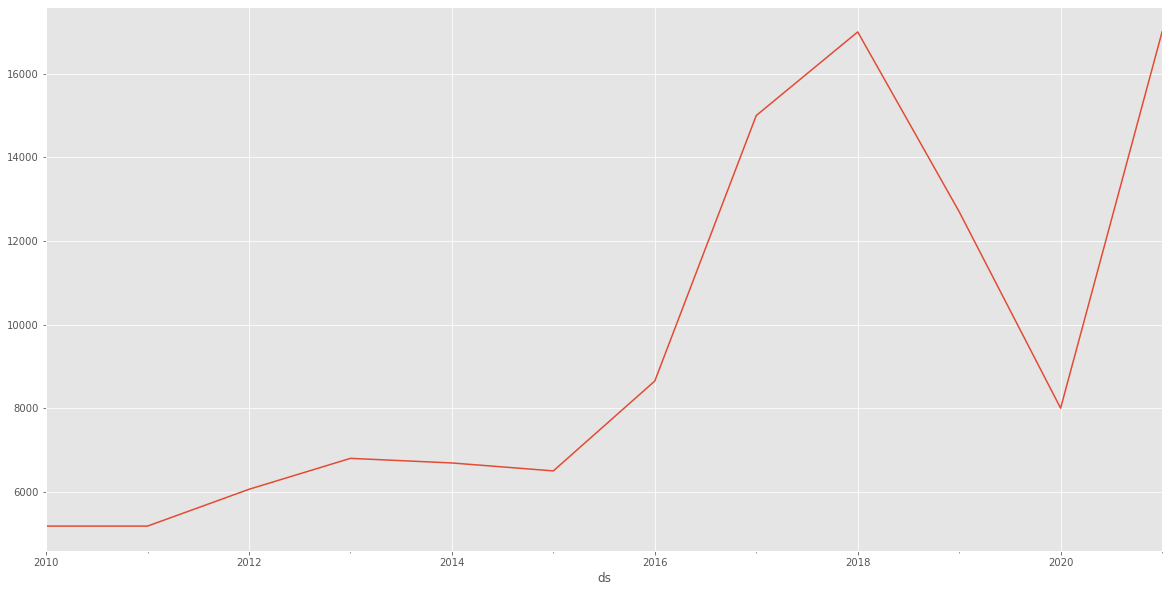

In [181]:
df.set_index('ds').y.plot()

In [182]:
df['y'] = np.log(df['y'])
df

,ds,y
0,2010-01-01,8.552560
1,2011-01-01,8.552560
2,2012-01-01,8.709465
3,2013-01-01,8.824678
4,2014-01-01,8.808369
5,2015-01-01,8.779557
6,2016-01-01,9.065315
7,2017-01-01,9.615805
8,2018-01-01,9.740969
9,2019-01-01,9.449357


<AxesSubplot:xlabel='ds'>

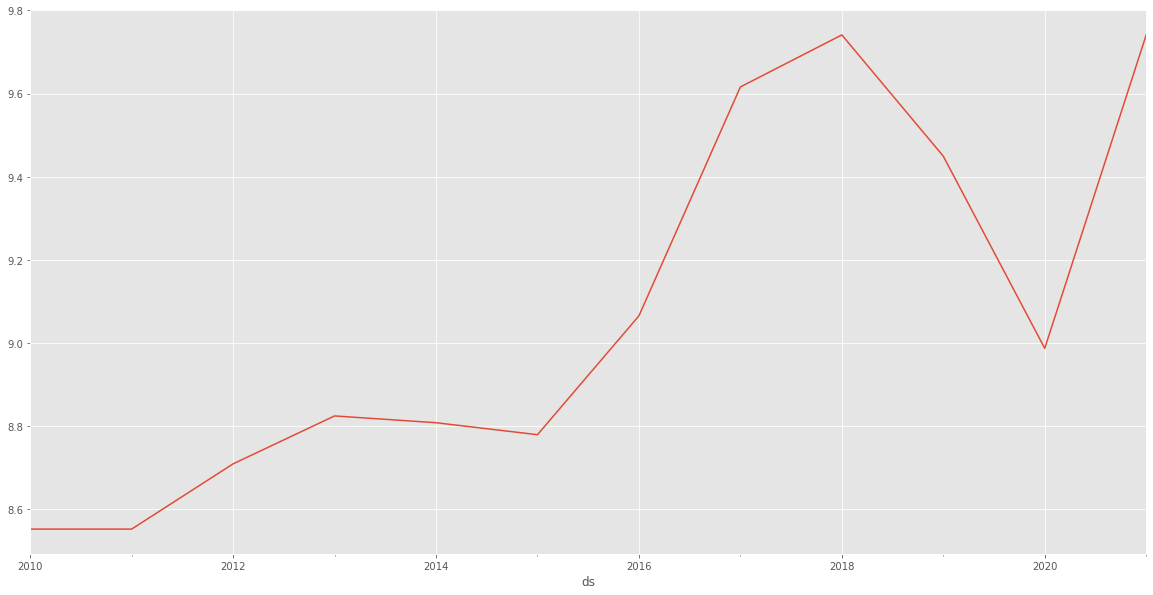

In [183]:
df.set_index('ds').y.plot()

In [184]:
model = Prophet()
model.fit(df);

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 8.


In [185]:
future = model.make_future_dataframe(periods=5, freq = 'y')
future.tail()

,ds
12,2021-12-31
13,2022-12-31
14,2023-12-31
15,2024-12-31
16,2025-12-31


In [186]:
forecast = model.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
12,2021-12-31,0.794378,8.898807,9.395907,0.794305,0.794445,8.358921,8.358921,8.358921,8.358921,8.358921,8.358921,0.0,0.0,0.0,9.153298
13,2022-12-31,0.894564,8.803035,9.300716,0.894303,0.894801,8.150334,8.150334,8.150334,8.150334,8.150334,8.150334,0.0,0.0,0.0,9.044899
14,2023-12-31,0.994751,8.661690,9.175291,0.994228,0.995240,7.923302,7.923302,7.923302,7.923302,7.923302,7.923302,0.0,0.0,0.0,8.918053
15,2024-12-31,1.095213,9.410857,9.888661,1.094421,1.096026,8.548762,8.548762,8.548762,8.548762,8.548762,8.548762,0.0,0.0,0.0,9.643974
16,2025-12-31,1.195399,9.310774,9.817029,1.194315,1.196542,8.358921,8.358921,8.358921,8.358921,8.358921,8.358921,0.0,0.0,0.0,9.554320


In [187]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
#forecast = forecast.rename(columns={'yhat':'predicted price'})

,ds,yhat,yhat_lower,yhat_upper
12,2021-12-31,9.153298,8.898807,9.395907
13,2022-12-31,9.044899,8.803035,9.300716
14,2023-12-31,8.918053,8.661690,9.175291
15,2024-12-31,9.643974,9.410857,9.888661
16,2025-12-31,9.554320,9.310774,9.817029


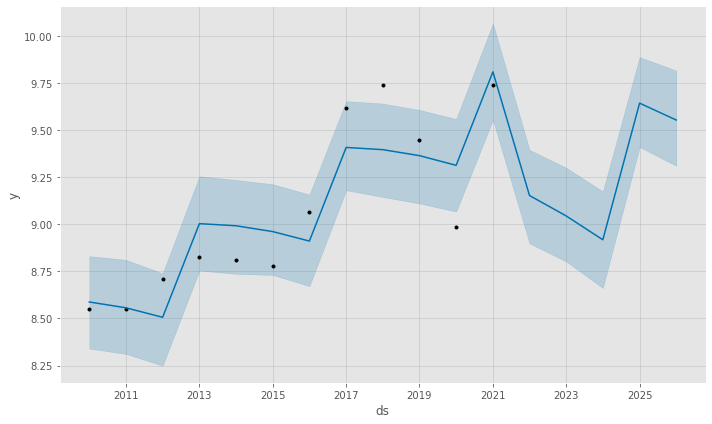

In [188]:
model.plot(forecast);

In [189]:
df.set_index('ds', inplace=True)
forecast.set_index('ds', inplace=True)

In [190]:
vis_df = data.join(forecast[['yhat', 'yhat_lower','yhat_upper']], how = 'outer')
vis_df

,Lithium_price,yhat,yhat_lower,yhat_upper
2010-01-01,5180.0,8.587542,8.340114,8.831081
2011-01-01,5180.0,8.556602,8.311588,8.811561
2012-01-01,6060.0,8.506198,8.249044,8.739474
2013-01-01,6800.0,9.003782,8.754570,9.255356
2014-01-01,6690.0,8.992485,8.737022,9.235997
2015-01-01,6500.0,8.961545,8.731070,9.213273
2016-01-01,8650.0,8.911140,8.671741,9.158486
2017-01-01,15000.0,9.408675,9.181243,9.654650
2018-01-01,17000.0,9.396894,9.145261,9.641738
2019-01-01,12700.0,9.364975,9.111090,9.607850


In [191]:
vis_df['yhat_rescaled'] = np.exp(vis_df['yhat'])
vis_df

,Lithium_price,yhat,yhat_lower,yhat_upper,yhat_rescaled
2010-01-01,5180.0,8.587542,8.340114,8.831081,5364.411045
2011-01-01,5180.0,8.556602,8.311588,8.811561,5200.977413
2012-01-01,6060.0,8.506198,8.249044,8.739474,4945.323343
2013-01-01,6800.0,9.003782,8.754570,9.255356,8133.788549
2014-01-01,6690.0,8.992485,8.737022,9.235997,8042.413741
2015-01-01,6500.0,8.961545,8.731070,9.213273,7797.391338
2016-01-01,8650.0,8.911140,8.671741,9.158486,7414.110535
2017-01-01,15000.0,9.408675,9.181243,9.654650,12193.708847
2018-01-01,17000.0,9.396894,9.145261,9.641738,12050.897766
2019-01-01,12700.0,9.364975,9.111090,9.607850,11672.312941


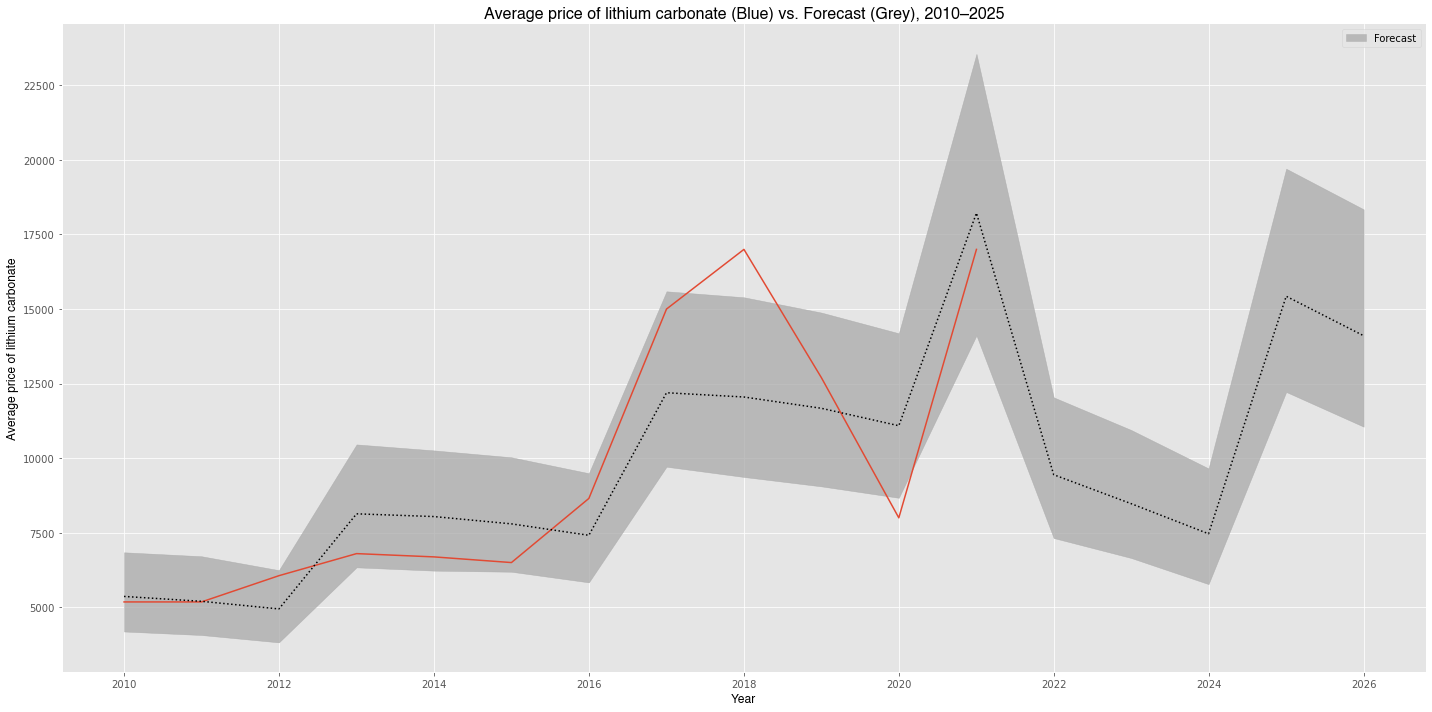

In [193]:
#vis_df[['Lithium_price', 'yhat_rescaled']].plot()
# Plot final visualisation

# Plot
fig, ax1 = plt.subplots()
ax1.plot(vis_df.Lithium_price)
ax1.plot(vis_df.yhat_rescaled, color='black', linestyle=':')

# Fill
ax1.fill_between(vis_df.index, np.exp(vis_df['yhat_upper']), np.exp(vis_df['yhat_lower']), alpha=0.75, 
                 color='darkgray', label = 'Forecast')

# Font families
font_1 = {'family':'helvetica','color':'black','size':16}
font_2 = {'family':'helvetica','color':'black','size':12}

# Labels
ax1.set_title('Average price of lithium carbonate (Blue) vs. Forecast (Grey), 2010–2025', fontdict = font_1)
ax1.set_ylabel('Average price of lithium carbonate', fontdict = font_2)
ax1.set_xlabel('Year', fontdict = font_2)

# Legend
plt.legend(title='', loc='upper right', ncol=1)

# Aesthetics
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()

# Show/save
#plt.savefig("../Images/Lithium_price/Lithium_price_forecast.png", 
            #transparent=False, dpi=300)
plt.show()